# Machine Learning Lab 3 - Finding Optimal House Rent
Submitted By <br/>
Name: **Rathod Nishit Shailesh** <br/>
Register Number: **19112014** <br/>
Class: **5 BSc Data Science** <br/>

<hr/>

## Lab Overview

##### Background
- You are working in the Lavasa Campus, helping our Public Relations Team to find houses for people who are in search for one.
You currently have the dataset that shows the Building Type, Location, Size, Building Area, No of Bathrooms, No of Balconies and how many people stayed in the building in the academic year 2020-21. This dataset also shows you the rent that is demanded by the current building owners.

##### New professor in University
- Prof Naived George Eapen is coming to Lavasa on this upcoming Friday, and he has contacted you to get an idea about the rent of the accomodation facilities as available there. You, being an amazing analyst, is very confident that you will be able to help him with the requirements that he has.

Below are some suggestions that Prof Naived has in mind:
1. 1 BHK with 2 Baths in Portofino Street
2. A Fully-Furnished 2 BHK Room, in School Street
3. A Super-Furnished Single Room, anywhere in Lavasa
4. A Fully-Furnished 2 BHK Room with two balconies

- He does not say what he has in mind with respect to other conditions, and he belives that you can provide case-wise results by populating other variable values.

##### Irritating Juniors Question
- You started by considering 70% of Data for Training and 30% for testing. Your juniors, seeing you do the training and testing for predicting house values, asks you few doubts.
What happens if you use different Random States for splitting the dataset before the training process?
  1. Is there any improvement in the Reduction of Training and Generalization Errors if you increase the percentage of Training to 80% and 90%?
  1. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
  1. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

#### Objective
- Get familiar with the problem statement, Know the dataset thoroghly, Analyse the given dataset by exploring the hidden insights with beautiful visuals and Train & Test the model for acurate rental pridiction.

#### Problem Definition
- Understand the Dataset & Features.
- Perform Data Preprocessing Technique to Get Balanced Structured Data.
- Perform Statistical Data Analysis and Derive Valuable Inferences.
- Perform Exploratory Data Analysis and Derive Valuable Insights.
- Train and Test through Different Regression Models for Better Pricdiction. 

#### Approach
This is an extension to the Problem Defnintion. Mention the process/appraoch that you have followed in order to reach out the above problem defintion.

- Step 1: Know the dataset thoroughly.
- Step 2: Perform preprocessing on data.
- Step 3: Import needfull libraries as an when you try to plot different graphs and evaluate the model.
- Step 4: Perform Statistical Data Analysis and Derive Valuable Inferences.
- Step 5: Perform Exploratory Data Analysis and Derive Valuable Insights.
- Step 6: Train and Test through Different Regression Models for Better Prediction.
- Step 7: Help the client with insights for choosing best rental property.

#### Sections
Here, mentioned sections are defined in the below code. For this lab, the sections are -
1. Lab Overview
1. Dataset Overview
1. Data Analyst Process
1. About Different Regression Models
1. Implementation and Evaluation of Different Regression Models
1. Conclusion

#### References
1. https://pandas.pydata.org/
1. https://matplotlib.org/
1. https://seaborn.pydata.org/
1. https://plotly.com/
1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
1. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Dataset Overview
- The dataset "HousePrices" is been retrieved to help the Public Relations Team who are working in the Christ (Deemed To Be University) Lavasa Campus, to find houses for people who are in search for one. 
- The dataset shows the 
  1. Building Type - Is it a fully/semi/Un furnished Single Room, Flat, or Villa ?
  1. Location - Where is the property located?
  1. Size - Is it 1BHK, 2BHK, 3BHK ?
  1. AreaSqFt - How much big is the property ? 
  1. No of Bath - How many bathrooms in the property?
  1. No of Balcony - How many balconies in the property?
  1. No of People - How many people stayed in the building in the academic year 2020-21.
  1. RentPerMonth - Rent to be paid per month which is demanded by the current building owners.

## Data Analyst Process

#### Import the required library.



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Read the Dataset.

In [2]:
df = pd.read_csv("HousePrices.csv")

#### Gain the Dataset Knowledge - Know Each Features Thorougly.


In [3]:
df.columns #Displays the column names.

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

In [4]:
df.shape #Displays the rows and column count

(1000, 8)

In [5]:
df.head() #Displays the first 5 rows by default.

BuildingType       Location   Size  AreaSqFt  NoOfBath  NoOfPeople  \
0  Minimum Budget Rooms    Portofino H  1 BHK     400.0         1           1   
1  Minimum Budget Rooms    Portofino H  1 BHK     450.0         1           1   
2  Minimum Budget Rooms  School Street  1 BHK     530.0         1           1   
3  Minimum Budget Rooms    Portofino B  1 BHK     400.0         1           1   
4  Minimum Budget Rooms  School Street  2 BHK     460.0         1           1   

   NoOfBalcony  RentPerMonth  
0            1        1100.0  
1            1        1100.0  
2            0        1166.0  
3            0        1400.0  
4            0        1500.0

In [6]:
df.tail() #Displays the last 5 rows by default.

BuildingType       Location   Size  AreaSqFt  NoOfBath  \
995  Super Furnished Villa    Portofino D  4 BHK    4900.0         4   
996  Super Furnished Villa    Portofino B  4 BHK    3750.0         4   
997  Super Furnished Villa  School Street  4 BHK    5270.0         4   
998  Super Furnished Villa    Portofino B  6 BHK    5100.0         7   
999  Super Furnished Villa    Portofino B  7 BHK    6300.0         6   

     NoOfPeople  NoOfBalcony  RentPerMonth  
995           6            3       70000.0  
996           5            0       76000.0  
997           5            3       80000.0  
998           6            3       90000.0  
999           6            3       96000.0

#### Adding "No of Room" and "Rent Per Person" as Feature. 

In [7]:
df['NoOfRoom'] = df['Size'].apply(lambda x: int(x.split(' ')[0]))
df.NoOfRoom.unique()

array([1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int64)

In [8]:
df['RentPerPerson'] = df['RentPerMonth'] / df['NoOfPeople']

In [9]:
df.info() #Gives the detail information about the dataset, features, dtypes, memory in use. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BuildingType   1000 non-null   object 
 1   Location       1000 non-null   object 
 2   Size           1000 non-null   object 
 3   AreaSqFt       1000 non-null   float64
 4   NoOfBath       1000 non-null   int64  
 5   NoOfPeople     1000 non-null   int64  
 6   NoOfBalcony    1000 non-null   int64  
 7   RentPerMonth   1000 non-null   float64
 8   NoOfRoom       1000 non-null   int64  
 9   RentPerPerson  1000 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [10]:
df.describe() #Displays the 5 parameter statistical summary [Count, Mean, Standard Deviation, Minimum value, Quartiles, Maximum value] for columns with numerical data.

AreaSqFt     NoOfBath   NoOfPeople  NoOfBalcony  RentPerMonth  \
count   1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean    1548.270010     2.661000     2.168000     1.544000  10476.633500   
std     1345.141175     1.247251     0.959529     0.838312  10509.508971   
min      375.000000     1.000000     1.000000     0.000000   1100.000000   
25%     1090.000000     2.000000     2.000000     1.000000   4890.500000   
50%     1270.000000     2.000000     2.000000     2.000000   7000.000000   
75%     1664.250000     3.000000     2.000000     2.000000  11925.000000   
max    35000.000000    11.000000     6.000000     3.000000  96000.000000   

          NoOfRoom  RentPerPerson  
count  1000.000000    1000.000000  
mean      2.767000    4424.255417  
std       1.193371    2380.065887  
min       1.000000    1100.000000  
25%       2.000000    2800.000000  
50%       3.000000    3915.750000  
75%       3.000000    5200.000000  
max       9.000000   25000.000000

### Statistical Inferences & Data Analysis

#### Exploring Missing Values Present In Dataset.

In [11]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['Variables','Missing values in percentage']

fig = px.imshow(df.isnull().T, template = 'ggplot2')
fig.update_layout(title = 'Missing Values In Dataset')
fig.show()

- The above frequency map for mising value draws the clear conclusion that there is no missing data present in the dataset. The dataset is structured completly.

In [12]:
print("Missing Values\n\n",df.isnull().sum())

Missing Values

 BuildingType     0
Location         0
Size             0
AreaSqFt         0
NoOfBath         0
NoOfPeople       0
NoOfBalcony      0
RentPerMonth     0
NoOfRoom         0
RentPerPerson    0
dtype: int64


#### Getting to Know the Distribution of Each Feature.

In [13]:
display(df[['BuildingType','Location','Size','NoOfBath','NoOfBalcony','NoOfPeople','NoOfRoom','RentPerMonth','RentPerPerson']].groupby(['BuildingType','Location','Size']).agg(["max",'mean',"min"]).style.background_gradient(cmap="twilight_r"))

In [14]:
def percentage(df):
    number = pd.DataFrame(df.value_counts())
    number.columns = ['Total']
    number['%'] = round((number['Total'] / df.notnull().sum()) * 100, 1)
    return number

##### Building Type

In [15]:
percentage(df["BuildingType"])

Total     %
Semi Furnished Single Room     274  27.4
Semi Furnished Flat            246  24.6
Fully Furnished Single Room    153  15.3
Minimum Budget Rooms           146  14.6
Semi Furnished Villa            63   6.3
Fully Furnished Flat            41   4.1
Super Furnished Single Room     25   2.5
Super Furnished Villa           21   2.1
Fully Furnished Villa           19   1.9
Super Furnished Flat            12   1.2

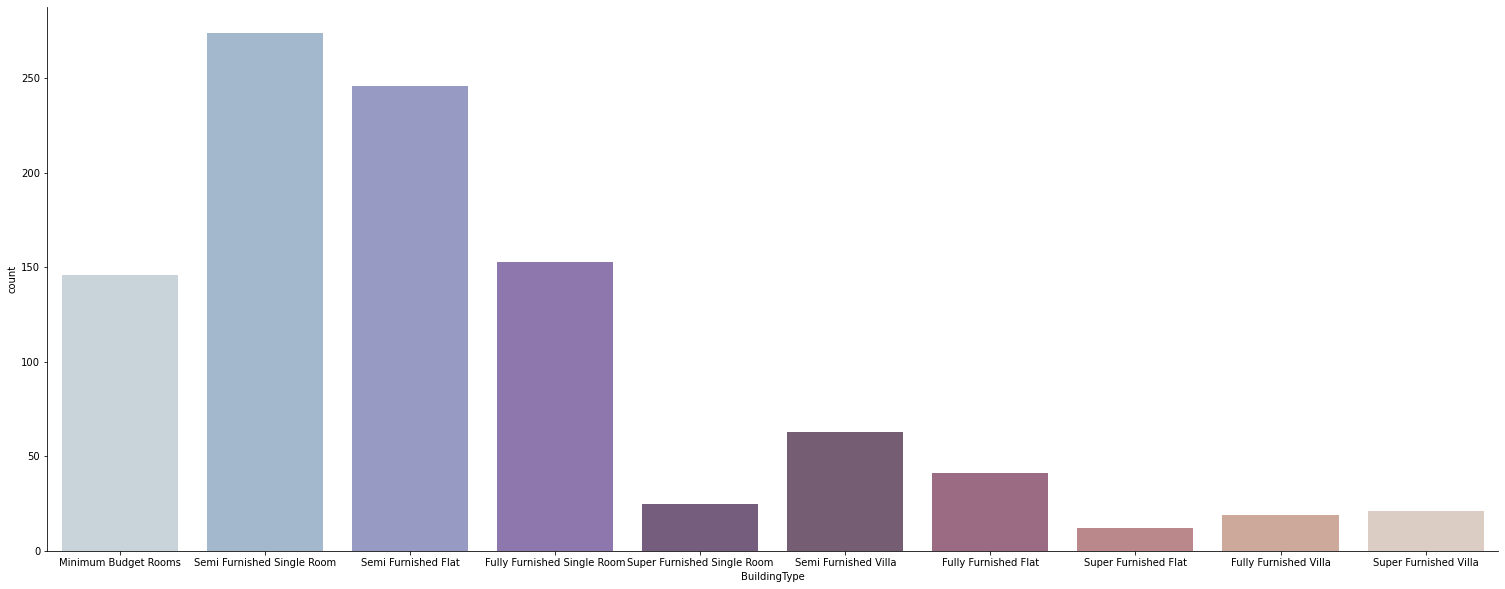

In [16]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'BuildingType', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [17]:
Pie = df['BuildingType'].value_counts().reset_index()
Pie.columns = ['BuildingType','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'BuildingType', values = 'Percent', title = 'BuildingType', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

##### Location

In [18]:
percentage(df["Location"])

Total     %
Clubview Road    213  21.3
Portofino B      173  17.3
School Street    138  13.8
Portofino D      105  10.5
Portofino C      103  10.3
Portofino A       95   9.5
Portofino H       62   6.2
Portofino E       54   5.4
Portofino G       26   2.6
Portofino F       22   2.2
Starter Homes      9   0.9

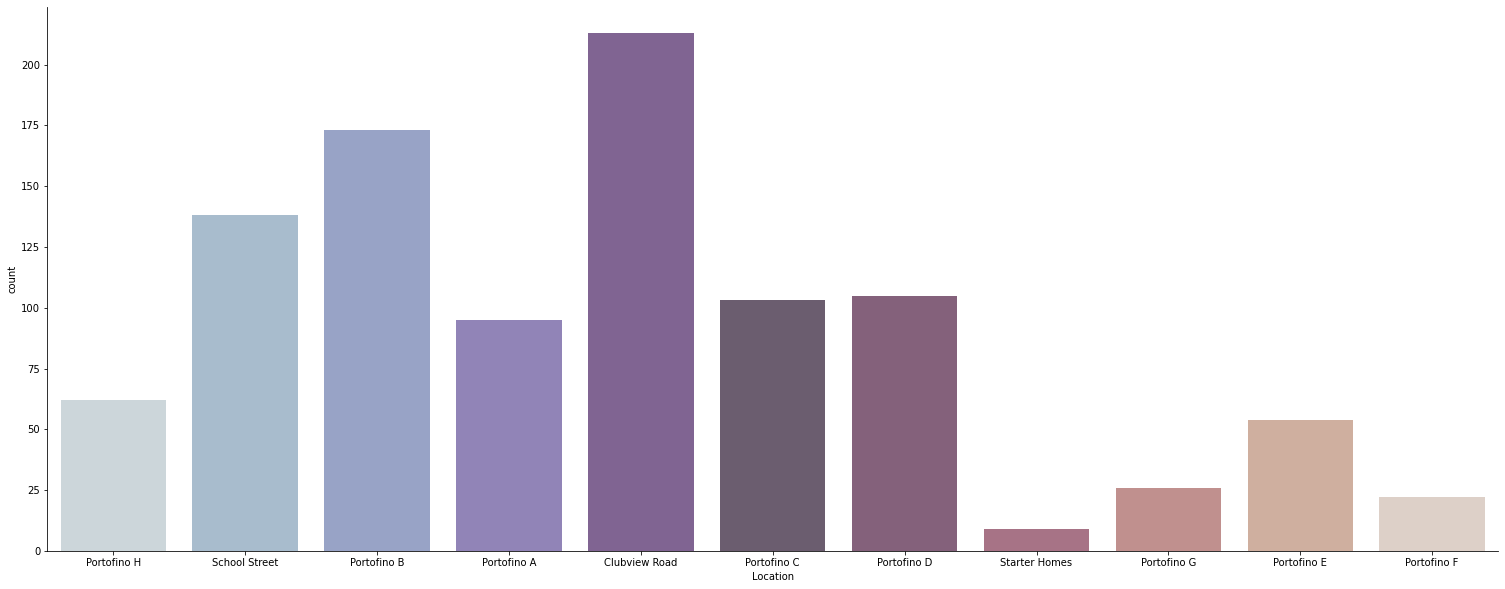

In [19]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'Location', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [20]:
Pie = df['Location'].value_counts().reset_index()
Pie.columns = ['Location','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Location', values = 'Percent', title = 'Location', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

##### Size

In [21]:
percentage(df["Size"])

Total     %
2 BHK    429  42.9
3 BHK    353  35.3
4 BHK    103  10.3
1 BHK     51   5.1
5 BHK     22   2.2
6 BHK     21   2.1
8 BHK      8   0.8
7 BHK      7   0.7
9 BHK      4   0.4
1 RK       2   0.2

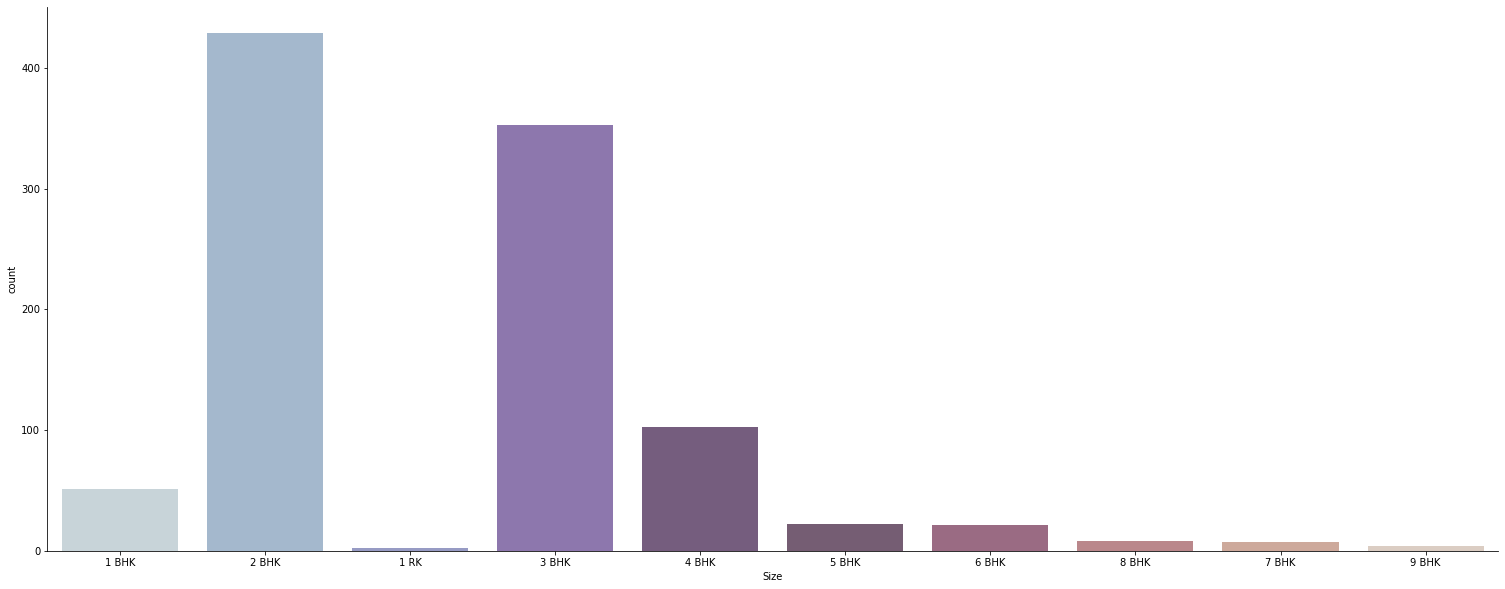

In [22]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'Size', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [23]:
Pie = df['Size'].value_counts().reset_index()
Pie.columns = ['Size','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Size', values = 'Percent', title = 'Size', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

##### No of Bathrooms

In [24]:
percentage(df["NoOfBath"])

Total     %
2     514  51.4
3     252  25.2
4      95   9.5
1      68   6.8
5      35   3.5
6      16   1.6
7      10   1.0
9       5   0.5
8       4   0.4
11      1   0.1

In [25]:
Pie = df['NoOfBath'].value_counts().reset_index()
Pie.columns = ['NoOfBath','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'NoOfBath', values = 'Percent', title = 'NoOfBath', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

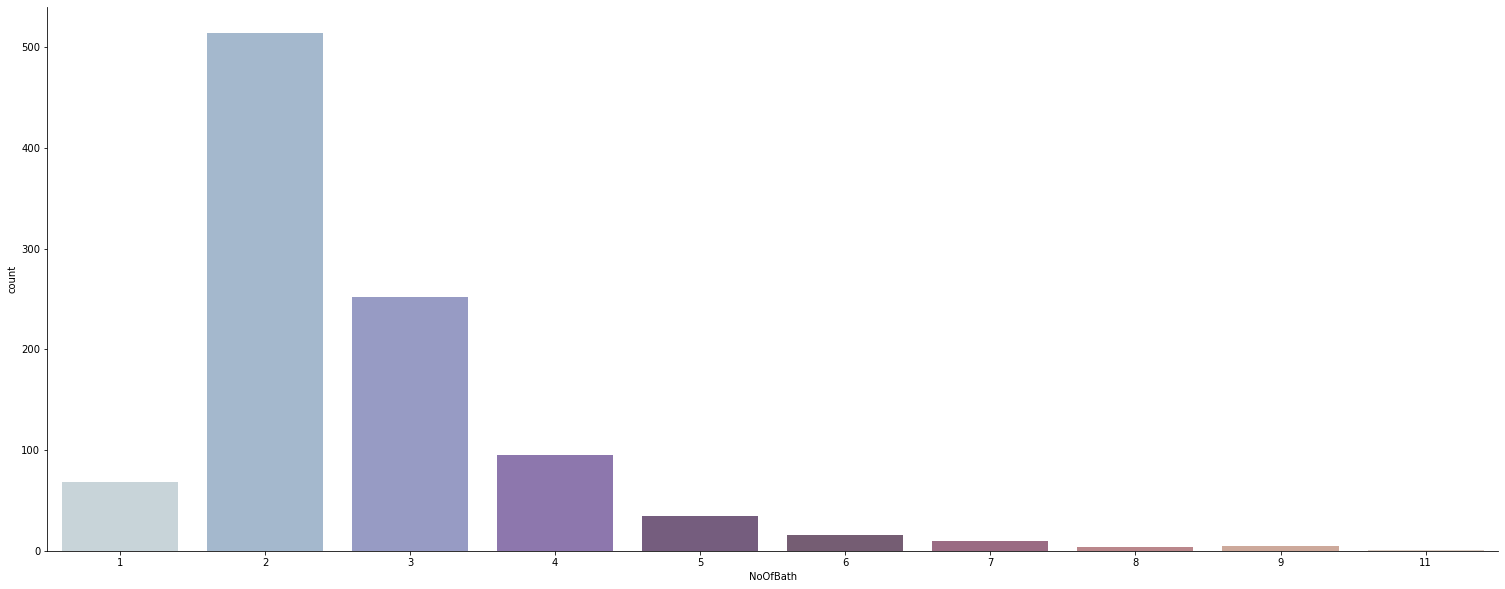

In [26]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'NoOfBath', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

- Most of the rental properties are equiped with either 2 or 3 bathrooms.

##### No of People

In [27]:
percentage(df["NoOfPeople"])

Total     %
2    574  57.4
1    192  19.2
3    165  16.5
4     27   2.7
5     27   2.7
6     15   1.5

In [28]:
Pie = df['NoOfPeople'].value_counts().reset_index()
Pie.columns = ['NoOfPeople','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'NoOfPeople', values = 'Percent', title = 'NoOfPeople', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

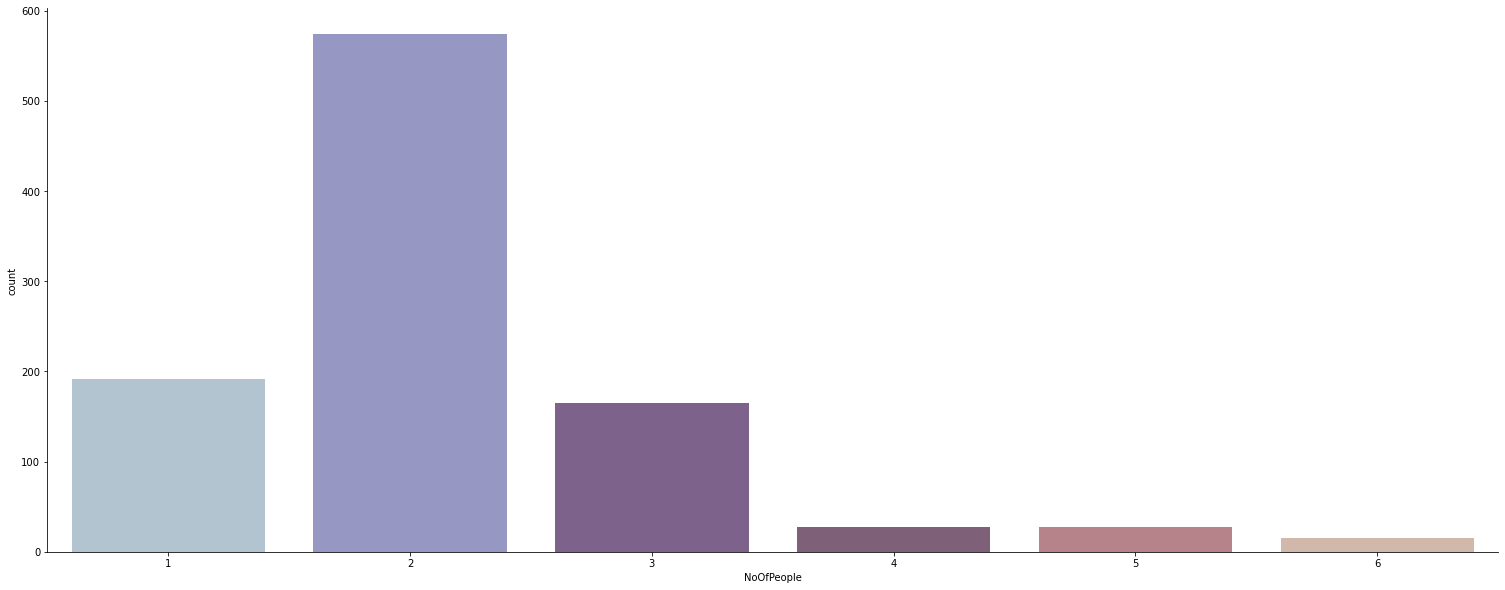

In [29]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'NoOfPeople', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

- Most of the rental properties were been shared for 2 people.

##### No of Balcony

In [30]:
percentage(df["NoOfBalcony"])

Total     %
2    393  39.3
1    380  38.0
3    126  12.6
0    101  10.1

In [31]:
Pie = df['NoOfBalcony'].value_counts().reset_index()
Pie.columns = ['NoOfBalcony','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'NoOfBalcony', values = 'Percent', title = 'NoOfBalcony', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

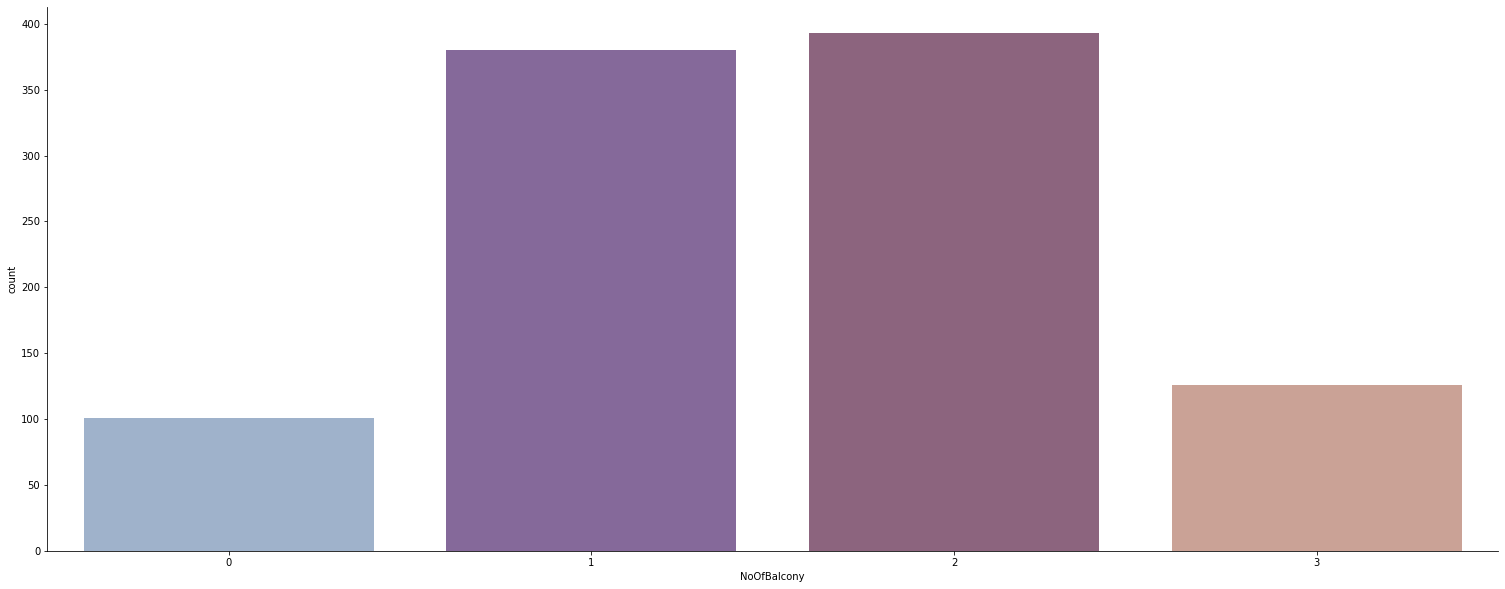

In [32]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'NoOfBalcony', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

- Around 38% of the rental properties is with 1 balcony.
- Around 39% of the rental properties is with 2 balcony.

##### Area square feet

<AxesSubplot:xlabel='AreaSqFt', ylabel='Density'>

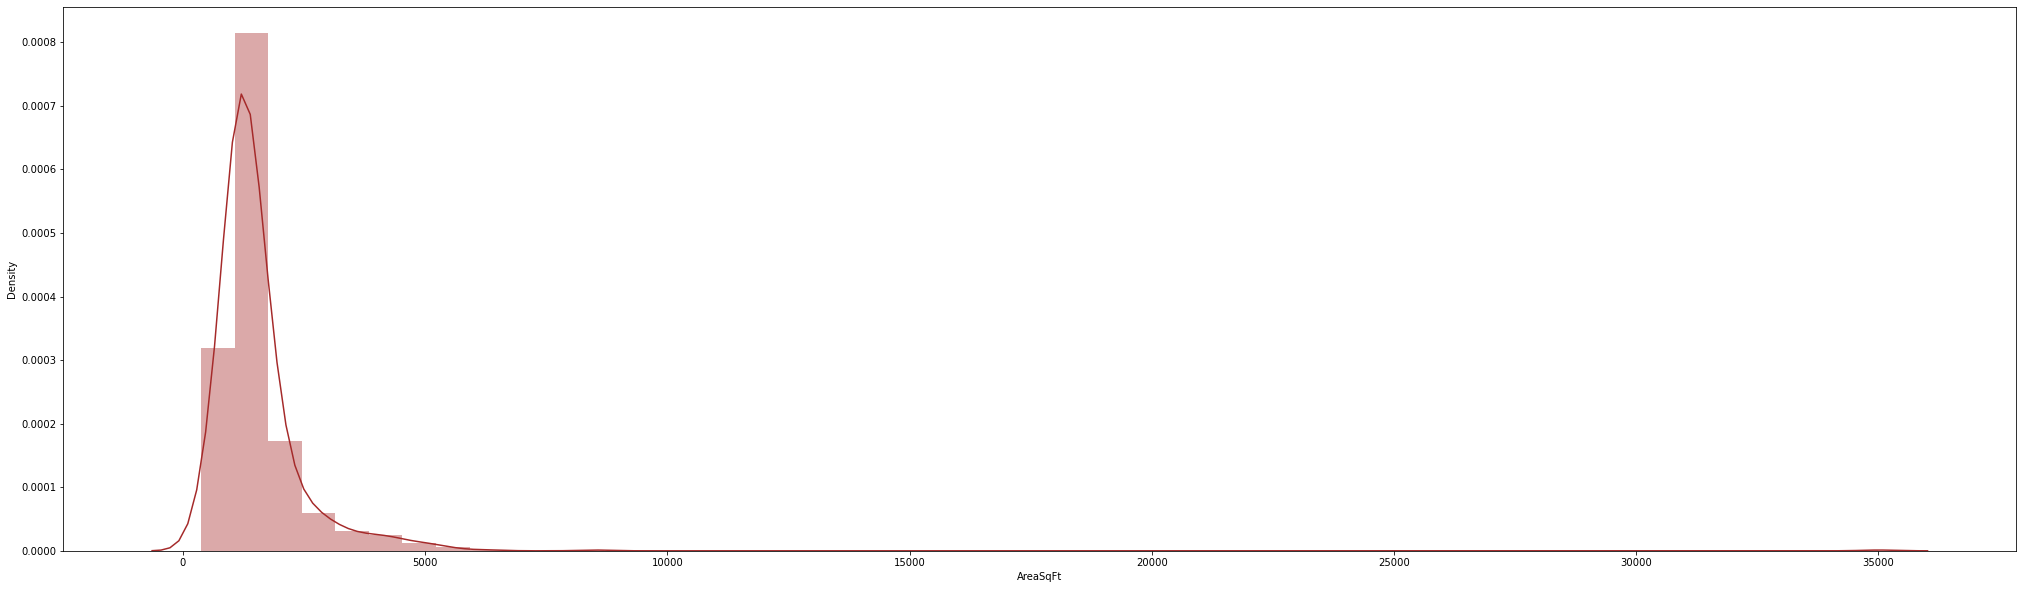

In [33]:
plt.figure(figsize=(35,10))
sns.distplot(df['AreaSqFt'], color = 'brown')

- The area sqaure feet of major rental properties is ranging between 400 to 2500 area sq. ft.

##### Rent Per Person

<AxesSubplot:xlabel='RentPerPerson', ylabel='Density'>

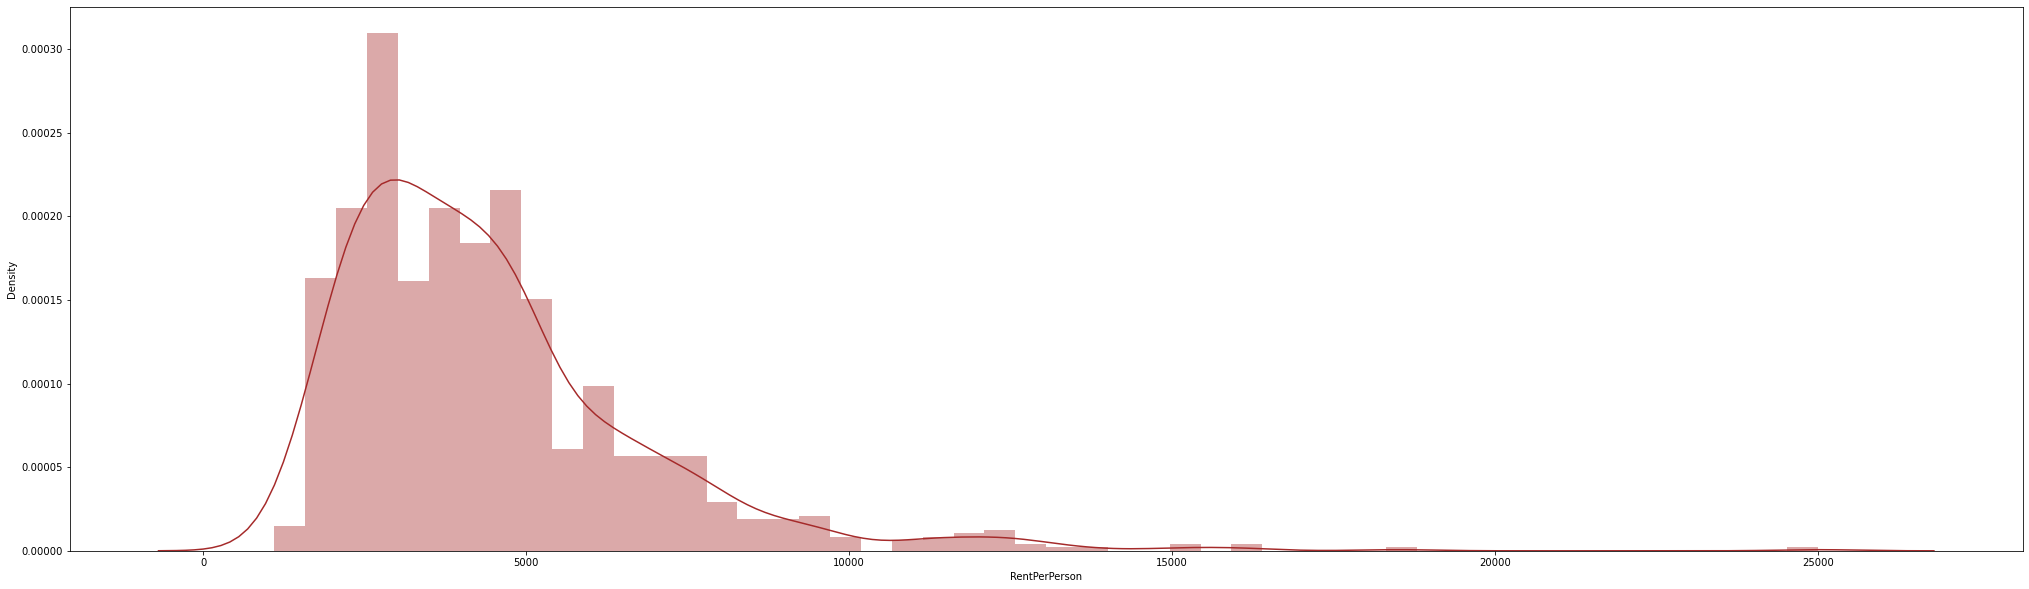

In [34]:
plt.figure(figsize=(35,10))
sns.distplot(df['RentPerPerson'], color = 'brown')

- Majorly it is noticed that people are convient to pay rent ranging between Rs 1100 to 6000 per month.

##### Rent Per Month

<AxesSubplot:xlabel='RentPerMonth', ylabel='Density'>

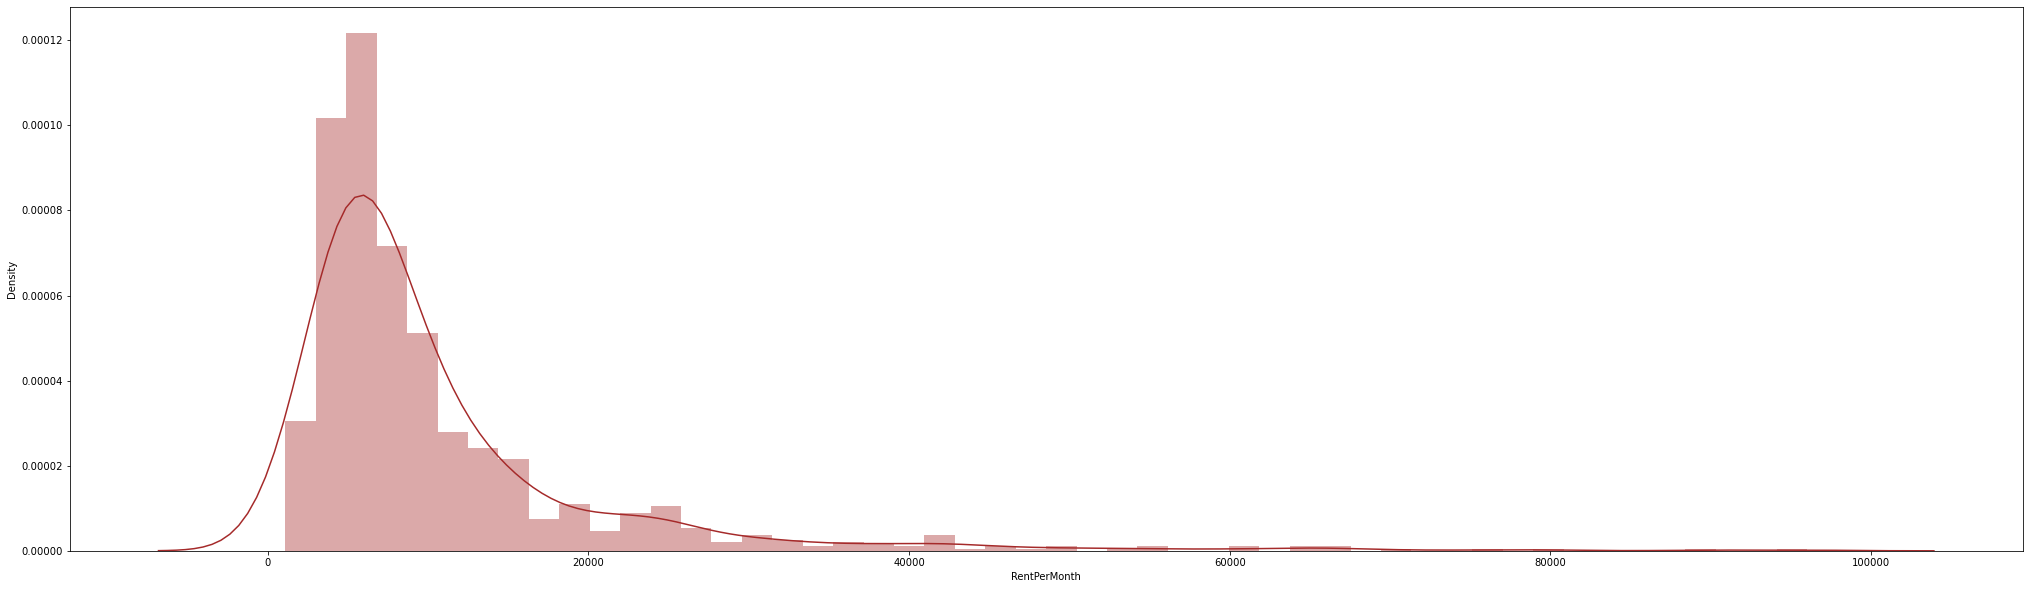

In [35]:
plt.figure(figsize=(35,10))
sns.distplot(df['RentPerMonth'], color = 'brown')

- The rent for major properties lie under the range of Rs 1100 to Rs 10000.

##### Top 10 Costilest Rental Property

In [36]:
df.sort_values(by="RentPerMonth", ascending = False).head(10)

BuildingType       Location   Size  AreaSqFt  NoOfBath  \
999  Super Furnished Villa    Portofino B  7 BHK    6300.0         6   
998  Super Furnished Villa    Portofino B  6 BHK    5100.0         7   
997  Super Furnished Villa  School Street  4 BHK    5270.0         4   
996  Super Furnished Villa    Portofino B  4 BHK    3750.0         4   
995  Super Furnished Villa    Portofino D  4 BHK    4900.0         4   
994  Super Furnished Villa    Portofino C  3 BHK    3761.0         3   
993  Super Furnished Villa    Portofino F  3 BHK    4000.0         3   
992  Super Furnished Villa    Portofino D  4 BHK    5700.0         5   
991  Super Furnished Villa  Clubview Road  4 BHK    2400.0         4   
990  Super Furnished Villa    Portofino C  4 BHK    5500.0         4   

     NoOfPeople  NoOfBalcony  RentPerMonth  NoOfRoom  RentPerPerson  
999           6            3       96000.0         7   16000.000000  
998           6            3       90000.0         6   15000.000000  
997           5            3       80000.0         4   16000.000000  
996           5            0       76000.0         4   15200.000000  
995           6            3       70000.0         4   11666.666667  
994           6            2       66000.0         3   11000.000000  
993           6            1       66000.0         3   11000.000000  
992           5            3       65000.0         4   13000.000000  
991           5            1       64000.0         4   12800.000000  
990           5            3       60000.0         4   12000.000000

##### Top 10 Cheapest Rental Property

In [37]:
df.sort_values(by="RentPerMonth", ascending = True).head(10)

BuildingType       Location   Size  AreaSqFt  NoOfBath  \
0        Minimum Budget Rooms    Portofino H  1 BHK     400.0         1   
1        Minimum Budget Rooms    Portofino H  1 BHK     450.0         1   
2        Minimum Budget Rooms  School Street  1 BHK     530.0         1   
3        Minimum Budget Rooms    Portofino B  1 BHK     400.0         1   
4        Minimum Budget Rooms  School Street  2 BHK     460.0         1   
5        Minimum Budget Rooms    Portofino A  1 BHK     600.0         1   
6  Semi Furnished Single Room  School Street  1 BHK     654.0         1   
7  Semi Furnished Single Room  School Street  1 BHK     645.0         1   
8  Semi Furnished Single Room  School Street  1 BHK     645.0         1   
9  Semi Furnished Single Room  Clubview Road  2 BHK     880.0         1   

   NoOfPeople  NoOfBalcony  RentPerMonth  NoOfRoom  RentPerPerson  
0           1            1        1100.0         1         1100.0  
1           1            1        1100.0         1         1100.0  
2           1            0        1166.0         1         1166.0  
3           1            0        1400.0         1         1400.0  
4           1            0        1500.0         2         1500.0  
5           1            1        1500.0         1         1500.0  
6           1            0        1513.5         1         1513.5  
7           1            1        1645.0         1         1645.0  
8           1            1        1645.0         1         1645.0  
9           1            1        1650.0         2         1650.0

##### Relationship among the features

In [38]:
df.corr()

AreaSqFt  NoOfBath  NoOfPeople  NoOfBalcony  RentPerMonth  \
AreaSqFt       1.000000  0.375791    0.374907     0.206123      0.473022   
NoOfBath       0.375791  1.000000    0.480063     0.258885      0.579693   
NoOfPeople     0.374907  0.480063    1.000000     0.184932      0.782853   
NoOfBalcony    0.206123  0.258885    0.184932     1.000000      0.193619   
RentPerMonth   0.473022  0.579693    0.782853     0.193619      1.000000   
NoOfRoom       0.323179  0.885717    0.436341     0.238891      0.519826   
RentPerPerson  0.428162  0.599787    0.387843     0.197620      0.808164   

               NoOfRoom  RentPerPerson  
AreaSqFt       0.323179       0.428162  
NoOfBath       0.885717       0.599787  
NoOfPeople     0.436341       0.387843  
NoOfBalcony    0.238891       0.197620  
RentPerMonth   0.519826       0.808164  
NoOfRoom       1.000000       0.553220  
RentPerPerson  0.553220       1.000000

Heatmap Showing the Correlation Between the Features.

Text(0.5, 1.0, 'Correlation between features')

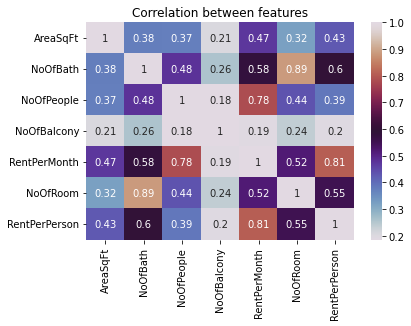

In [39]:
sns.heatmap(df.corr(), annot = True, cmap = "twilight").set_title("Correlation between features")

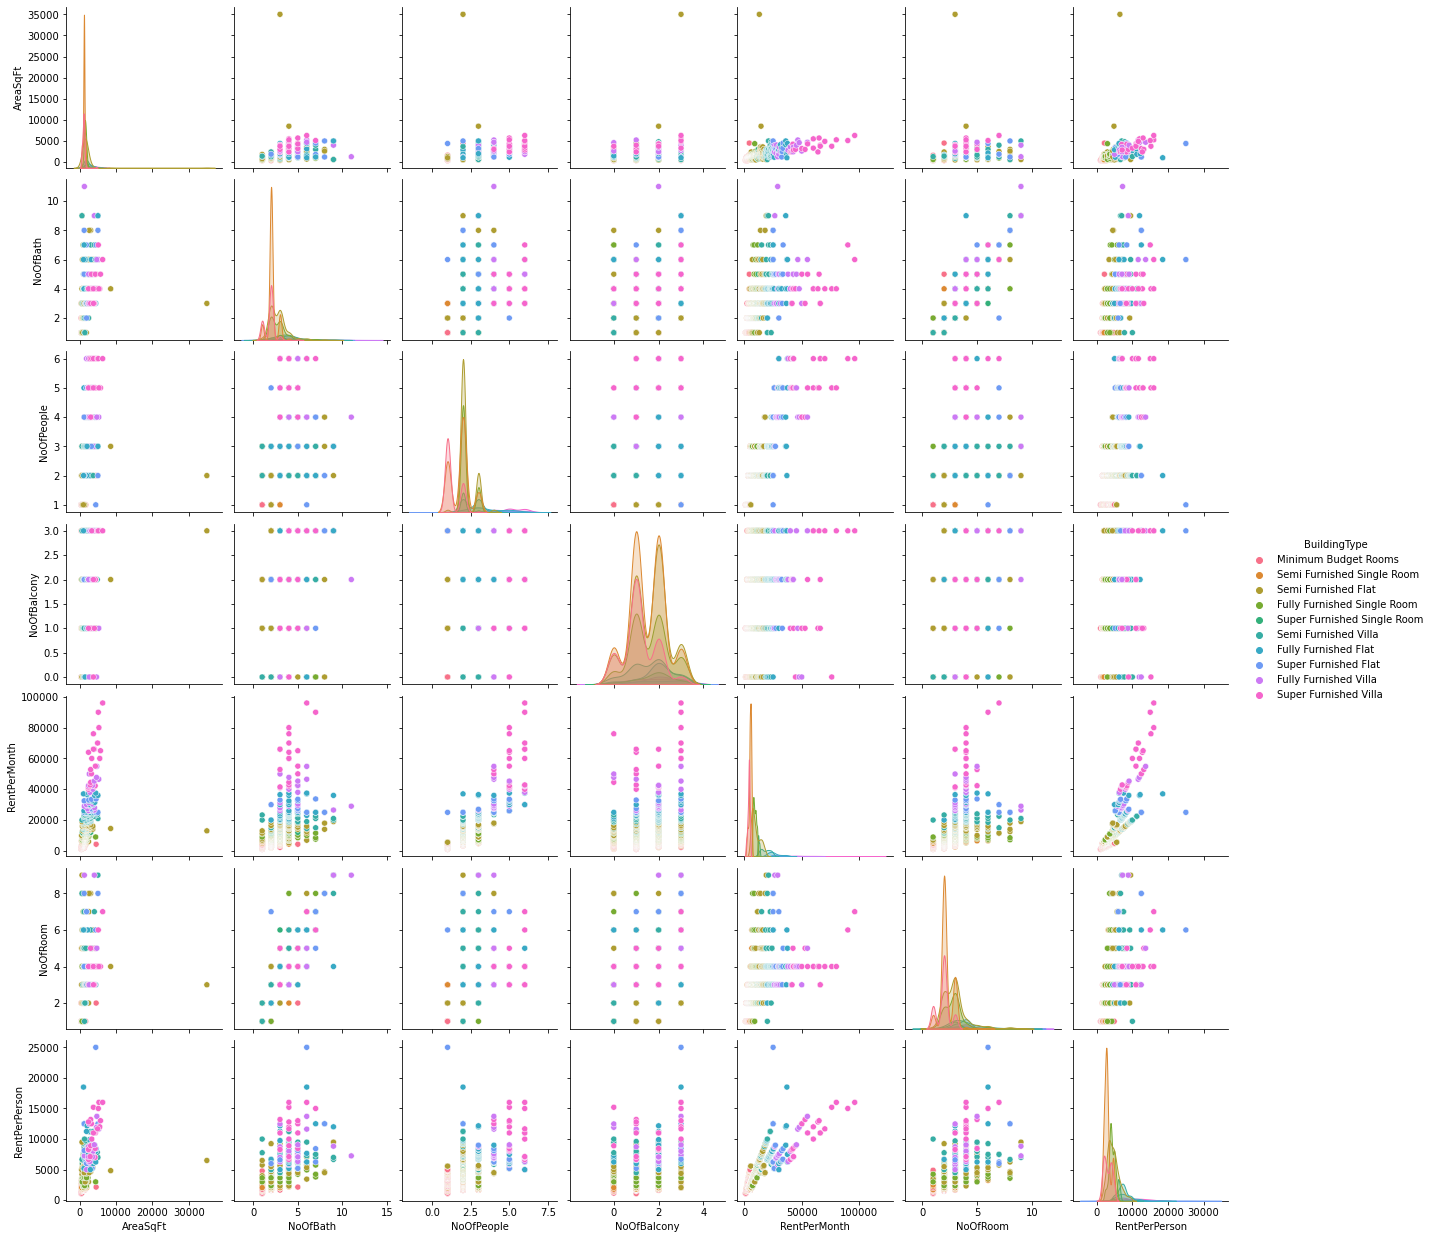

In [40]:
sns.set_palette("Spectral")
sns.pairplot(df, hue = 'BuildingType')

 - From the correlation table it is noticed that  - More the amount of people staying in the property the more is the monthly rent to be paid.

## About Different Regression Models


### Linear Regression

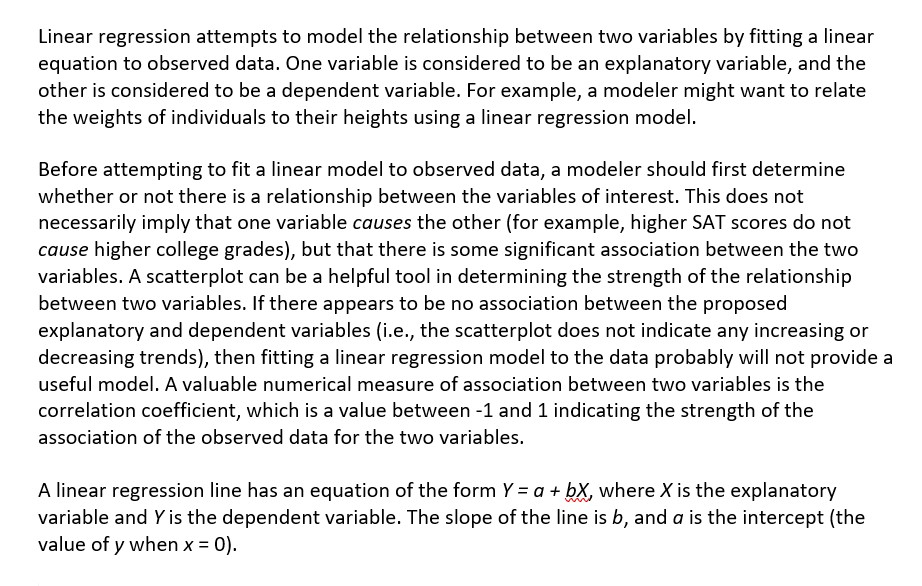

### Ridge Regression

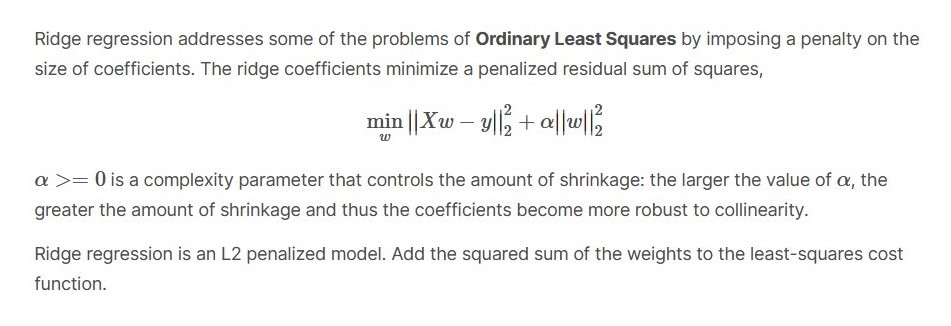

### Lasso Regression

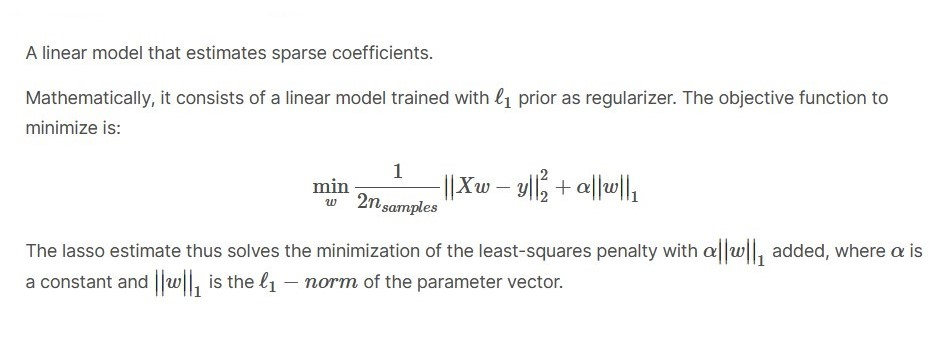

### Elastic Net Regression

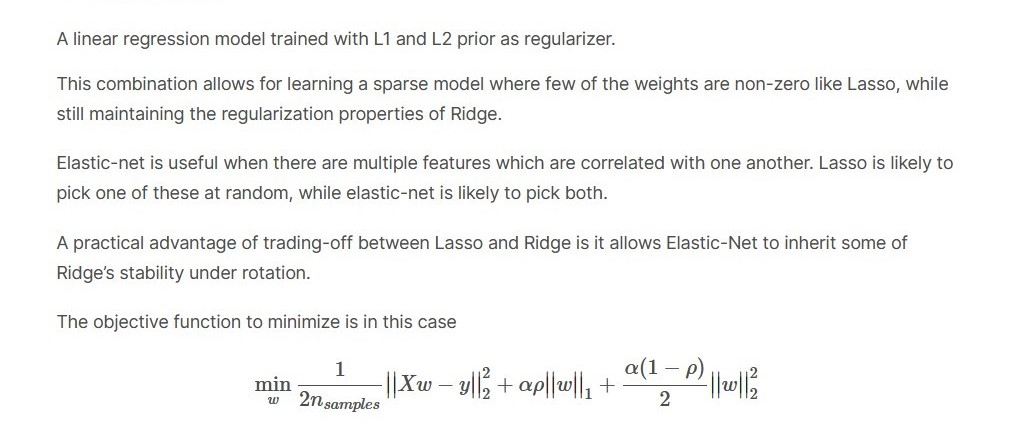

### Polynomial Regression

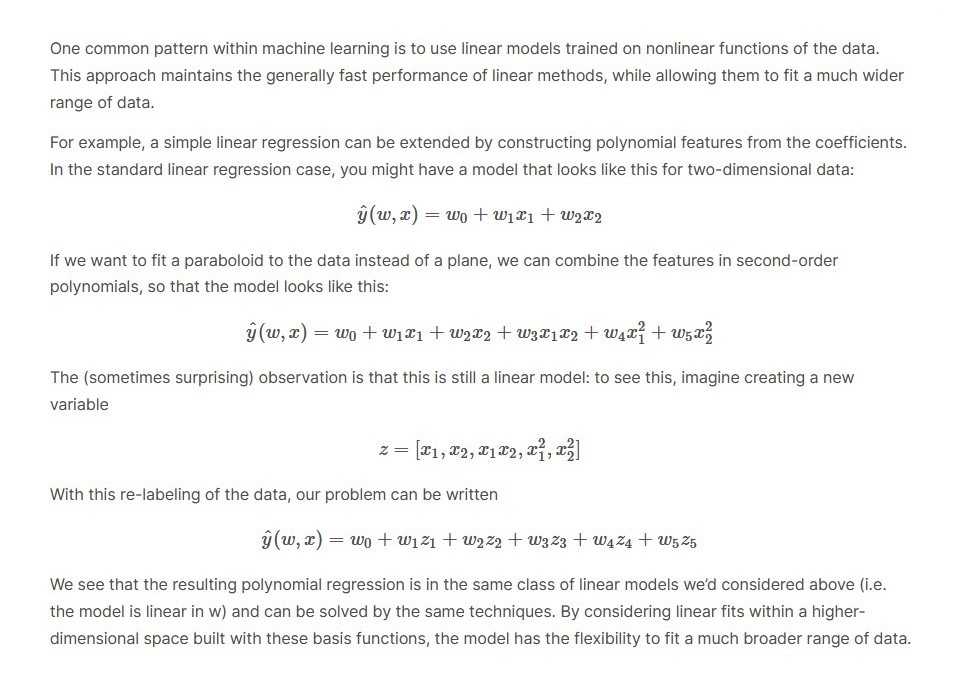

### Regression Evaluation Matrics

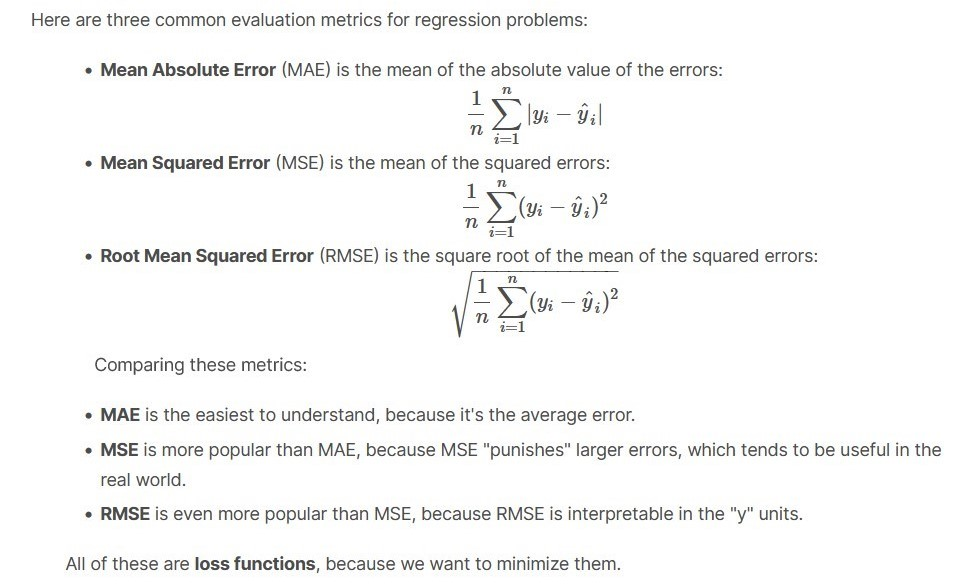

## Regression Models Implementation and Evaluation with 70:30 Split

Initialising X and Y arrays.

In [41]:
X = df[['AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony','NoOfRoom']]
y = df['RentPerMonth']

Test Train Split

70:30 Train - Test Split, Random State of 42

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [43]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (700, 5)
Shape of X_test:  (300, 5)
Shape of y_train:  (700,)
Shape of y_test (300,)


In [44]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Preparing Data For Regression

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [47]:
print("Intercept:",lin_reg.intercept_)

Intercept: 10308.497857142856


In [48]:
coefficient_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficient_df

Coefficient
AreaSqFt     1488.399871
NoOfBath     2734.423858
NoOfPeople   5931.848205
NoOfBalcony  -254.417339
NoOfRoom       89.649200

In [49]:
pred = lin_reg.predict(X_test)

In [50]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3811.017075584994
MSE: 37133262.273417756
RMSE: 6093.706776127135
R2 Square 0.7156628500197488
__________________________________
Train set evaluation:
_____________________________________
MAE: 3758.8390967891683
MSE: 33799901.09455158
RMSE: 5813.768235366076
R2 Square 0.6672049554455552
__________________________________


In [51]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3811.017076  3.713326e+07  6093.706776   0.715663   

   Cross Validation  
0       -189.153433

### Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3637.9314664636863
MSE: 38958443.95624464
RMSE: 6241.669965341378
R2 Square 0.7016870524162437
__________________________________
Train set evaluation:
_____________________________________
MAE: 3605.3561353620953
MSE: 34478320.7714739
RMSE: 5871.824313743889
R2 Square 0.6605252108517354
__________________________________


In [53]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3811.017076  3.713326e+07  6093.706776   0.715663   
1   Ridge Regression  3637.931466  3.895844e+07  6241.669965   0.701687   

   Cross Validation  
0       -189.153433  
1       -188.913057

### Lasso Regression

In [54]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              #warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3810.2562102075885
MSE: 36969835.16109488
RMSE: 6080.282490238005
R2 Square 0.7169142455746352
__________________________________
Train set evaluation:
_____________________________________
MAE: 3764.629560974583
MSE: 33858549.17667226
RMSE: 5818.809945055111
R2 Square 0.6666275043149208
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3811.017076  3.713326e+07  6093.706776   0.715663   
1   Ridge Regression  3637.931466  3.895844e+07  6241.669965   0.701687   
2   Lasso Regression  3810.256210  3.696984e+07  6080.282490   0.716914   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256

### Elastic Net Regression

In [56]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3793.9175614679575
MSE: 37208688.864493735
RMSE: 6099.892528929812
R2 Square 0.7150852928479238
__________________________________
Train set evaluation:
_____________________________________
MAE: 3745.0843943743034
MSE: 33805573.39826415
RMSE: 5814.256048564093
R2 Square 0.6671491057387331
__________________________________


In [57]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  3811.017076  3.713326e+07  6093.706776   0.715663   
1        Ridge Regression  3637.931466  3.895844e+07  6241.669965   0.701687   
2        Lasso Regression  3810.256210  3.696984e+07  6080.282490   0.716914   
3  Elastic Net Regression  3793.917561  3.720869e+07  6099.892529   0.715085   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575

### Polynomial Regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2696.9769039236708
MSE: 21471393.373849813
RMSE: 4633.723489144536
R2 Square 0.8355890534725327
__________________________________
Train set evaluation:
_____________________________________
MAE: 2548.4064607504297
MSE: 16729109.014719853
RMSE: 4090.123349572706
R2 Square 0.83528458961061
__________________________________


In [59]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  3811.017076  3.713326e+07  6093.706776   0.715663   
1        Ridge Regression  3637.931466  3.895844e+07  6241.669965   0.701687   
2        Lasso Regression  3810.256210  3.696984e+07  6080.282490   0.716914   
3  Elastic Net Regression  3793.917561  3.720869e+07  6099.892529   0.715085   
4   Polynomail Regression  2696.976904  2.147139e+07  4633.723489   0.835589   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575  
4          0.000000

### Model Comparision with respect to R - Square [ Accuracy ] and Root Mean Sum of Errors [ Error ]

<AxesSubplot:ylabel='Model'>

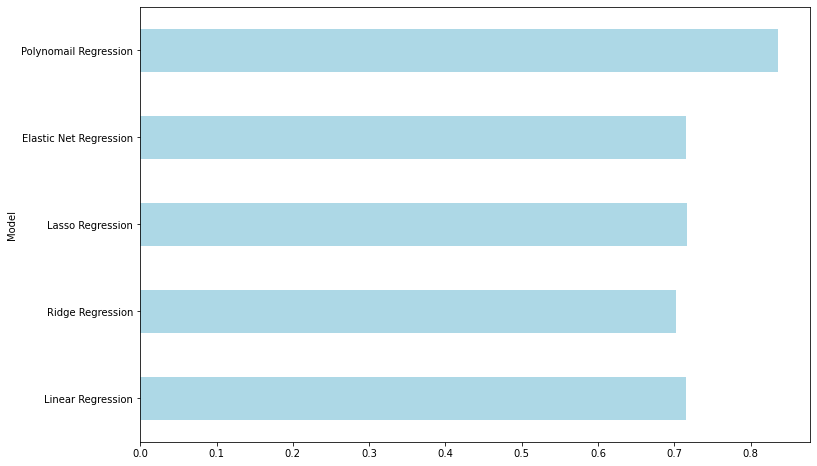

In [60]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', color = "Lightblue", figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

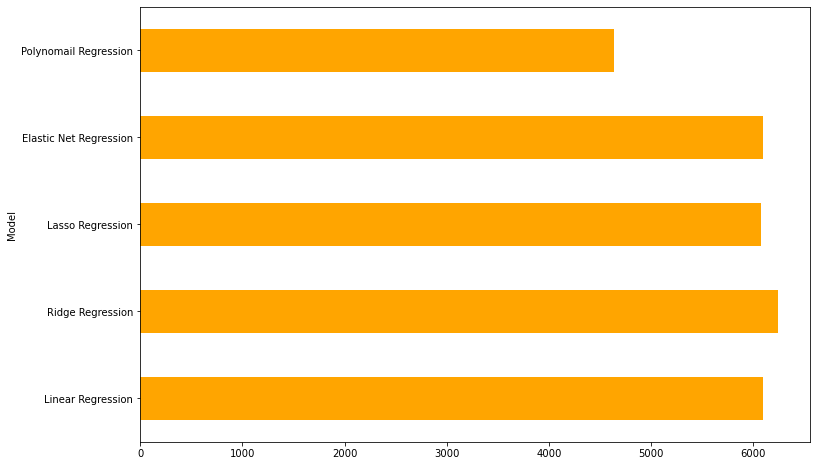

In [61]:
results_df['RMSE'].plot(kind='barh', color = "Orange", figsize=(12, 8))

## Regression Models Implementation and Evaluation with 75:25 Split

Initialising X and Y array

In [62]:
X = df[['AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony','NoOfRoom']]
y = df['RentPerMonth']

Train - Test Split

75:25 Train - Test Split, Random State of 55.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 55)

In [64]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (750, 5)
Shape of X_test:  (250, 5)
Shape of y_train:  (750,)
Shape of y_test (250,)


In [65]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Preparing Data For Regression

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [68]:
print("Intercept:",lin_reg.intercept_)

Intercept: 10382.950666666668


In [69]:
coefficient_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficient_df

Coefficient
AreaSqFt     1498.954015
NoOfBath     1794.529768
NoOfPeople   6342.814133
NoOfBalcony   -80.479736
NoOfRoom      771.099734

In [70]:
pred = lin_reg.predict(X_test)

In [71]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3859.401604548246
MSE: 33507851.57004243
RMSE: 5788.596684002301
R2 Square 0.7158036209381564
__________________________________
Train set evaluation:
_____________________________________
MAE: 3796.6324260071665
MSE: 35120925.27262434
RMSE: 5926.291021593889
R2 Square 0.6741506599372715
__________________________________


In [72]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3859.401605  3.350785e+07  5788.596684   0.715804   

   Cross Validation  
0       -189.153433

### Ridge Regression

In [73]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=55)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3738.0070366538694
MSE: 35264256.46347101
RMSE: 5938.37153296011
R2 Square 0.7009066971579049
__________________________________
Train set evaluation:
_____________________________________
MAE: 3627.224640373054
MSE: 35716745.847612865
RMSE: 5976.348872648991
R2 Square 0.6686226808294109
__________________________________


In [74]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3859.401605  3.350785e+07  5788.596684   0.715804   
1   Ridge Regression  3738.007037  3.526426e+07  5938.371533   0.700907   

   Cross Validation  
0       -189.153433  
1       -188.913057

### Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state = 55)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3855.1966205622657
MSE: 33524855.096102037
RMSE: 5790.065206550099
R2 Square 0.7156594057673532
__________________________________
Train set evaluation:
_____________________________________
MAE: 3800.6550886653204
MSE: 35126800.219983675
RMSE: 5926.786669012448
R2 Square 0.674096152611366
__________________________________


In [76]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3859.401605  3.350785e+07  5788.596684   0.715804   
1   Ridge Regression  3738.007037  3.526426e+07  5938.371533   0.700907   
2   Lasso Regression  3855.196621  3.352486e+07  5790.065207   0.715659   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256

### Elastic Net Regression

In [77]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection = 'random', random_state=55)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3849.2226592645757
MSE: 33620684.30773484
RMSE: 5798.33461501963
R2 Square 0.714846631635969
__________________________________
Train set evaluation:
_____________________________________
MAE: 3781.335461923788
MSE: 35125551.08870134
RMSE: 5926.681287930146
R2 Square 0.6741077419587662
__________________________________


In [78]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  3859.401605  3.350785e+07  5788.596684   0.715804   
1        Ridge Regression  3738.007037  3.526426e+07  5938.371533   0.700907   
2        Lasso Regression  3855.196621  3.352486e+07  5790.065207   0.715659   
3  Elastic Net Regression  3849.222659  3.362068e+07  5798.334615   0.714847   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575

### Polynomial Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train_2_d, y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2590.5555467118725
MSE: 16520956.58430885
RMSE: 4064.597960968446
R2 Square 0.8598777355186741
__________________________________
Train set evaluation:
_____________________________________
MAE: 2607.1848830481968
MSE: 18636840.60795079
RMSE: 4317.040723452907
R2 Square 0.8270887749734606
__________________________________


In [80]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  3859.401605  3.350785e+07  5788.596684   0.715804   
1        Ridge Regression  3738.007037  3.526426e+07  5938.371533   0.700907   
2        Lasso Regression  3855.196621  3.352486e+07  5790.065207   0.715659   
3  Elastic Net Regression  3849.222659  3.362068e+07  5798.334615   0.714847   
4   Polynomail Regression  2590.555547  1.652096e+07  4064.597961   0.859878   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575  
4          0.000000

### Model Comparision with respect to R - Square [ Accuracy ] and Root Mean Sum of Errors [ Error ]

<AxesSubplot:ylabel='Model'>

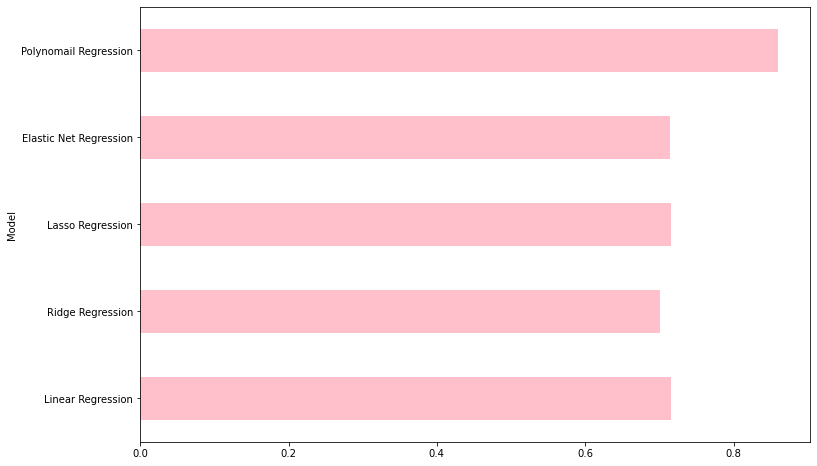

In [81]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh',color = "Pink", figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

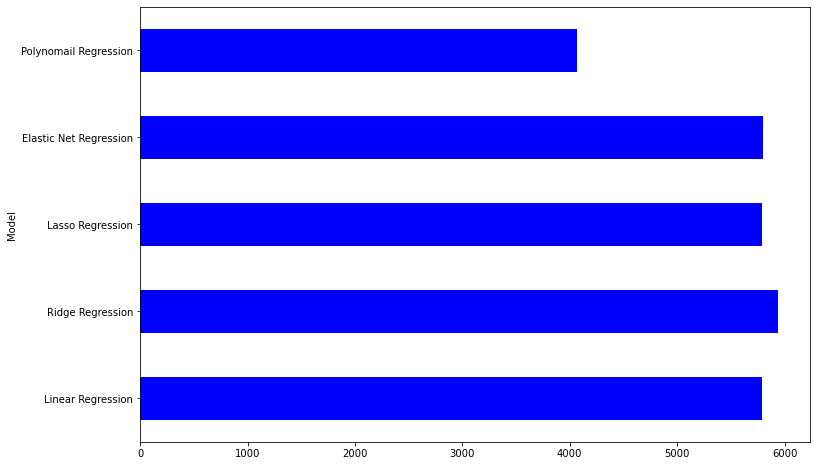

In [82]:
results_df['RMSE'].plot(kind='barh', color = "Blue", figsize=(12, 8))

## Regression Models Implementation and Evaluation with 80:20 Split

Initialising X and Y array

In [83]:
X = df[['AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony','NoOfRoom']]
y = df['RentPerMonth']

Train - Test Split

80:20 Train - Test Split, Random State of 63.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 63)

In [85]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (800, 5)
Shape of X_test:  (200, 5)
Shape of y_train:  (800,)
Shape of y_test (200,)


In [86]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Preparing Data For Regression

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [89]:
print("Intercept:",lin_reg.intercept_)

Intercept: 10732.349374999998


In [90]:
coefficient_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficient_df

Coefficient
AreaSqFt     1582.033798
NoOfBath     2823.277972
NoOfPeople   6784.969821
NoOfBalcony  -106.217378
NoOfRoom     -616.667702

In [91]:
pred = lin_reg.predict(X_test)

In [92]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3733.231959632685
MSE: 34275068.069253
RMSE: 5854.4912733091505
R2 Square 0.6524387741322335
__________________________________
Train set evaluation:
_____________________________________
MAE: 3841.363239619894
MSE: 34792231.07805072
RMSE: 5898.493966941962
R2 Square 0.691949387467119
__________________________________


In [93]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model         MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3733.23196  3.427507e+07  5854.491273   0.652439   

   Cross Validation  
0       -189.153433

### Ridge Regression

In [94]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=63)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3513.094397826516
MSE: 32985094.58174338
RMSE: 5743.265149872795
R2 Square 0.6655195582680922
__________________________________
Train set evaluation:
_____________________________________
MAE: 3693.1373461216845
MSE: 35557315.57159805
RMSE: 5962.995520004862
R2 Square 0.6851753249947254
__________________________________


In [95]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3733.231960  3.427507e+07  5854.491273   0.652439   
1   Ridge Regression  3513.094398  3.298509e+07  5743.265150   0.665520   

   Cross Validation  
0       -189.153433  
1       -188.913057

### Lasso Regression

In [96]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state = 63)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3745.623774983137
MSE: 33477402.075540494
RMSE: 5785.965958726381
R2 Square 0.6605273874078538
__________________________________
Train set evaluation:
_____________________________________
MAE: 3842.229916913576
MSE: 34881865.3420028
RMSE: 5906.087143109455
R2 Square 0.6911557651825224
__________________________________


In [97]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3733.231960  3.427507e+07  5854.491273   0.652439   
1   Ridge Regression  3513.094398  3.298509e+07  5743.265150   0.665520   
2   Lasso Regression  3745.623775  3.347740e+07  5785.965959   0.660527   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256

### Elastic Net Regression

In [98]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection = 'random', random_state=63)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3712.455094168168
MSE: 34023212.18273324
RMSE: 5832.941983487684
R2 Square 0.6549926812604105
__________________________________
Train set evaluation:
_____________________________________
MAE: 3823.8187408555327
MSE: 34801077.766850494
RMSE: 5899.243830089624
R2 Square 0.6918710588339956
__________________________________


In [99]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  3733.231960  3.427507e+07  5854.491273   0.652439   
1        Ridge Regression  3513.094398  3.298509e+07  5743.265150   0.665520   
2        Lasso Regression  3745.623775  3.347740e+07  5785.965959   0.660527   
3  Elastic Net Regression  3712.455094  3.402321e+07  5832.941983   0.654993   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575

### Polynomial Regression

In [100]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train_2_d, y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2565.1422932843293
MSE: 21261984.232858967
RMSE: 4611.071917988155
R2 Square 0.7843960137607207
__________________________________
Train set evaluation:
_____________________________________
MAE: 2574.1630525554497
MSE: 18075244.26245491
RMSE: 4251.499060620255
R2 Square 0.8399616841403597
__________________________________


In [101]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  3733.231960  3.427507e+07  5854.491273   0.652439   
1        Ridge Regression  3513.094398  3.298509e+07  5743.265150   0.665520   
2        Lasso Regression  3745.623775  3.347740e+07  5785.965959   0.660527   
3  Elastic Net Regression  3712.455094  3.402321e+07  5832.941983   0.654993   
4   Polynomail Regression  2565.142293  2.126198e+07  4611.071918   0.784396   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575  
4          0.000000

### Model Comparision with respect to R - Square [ Accuracy ] and Root Mean Sum of Errors [ Error ]

<AxesSubplot:ylabel='Model'>

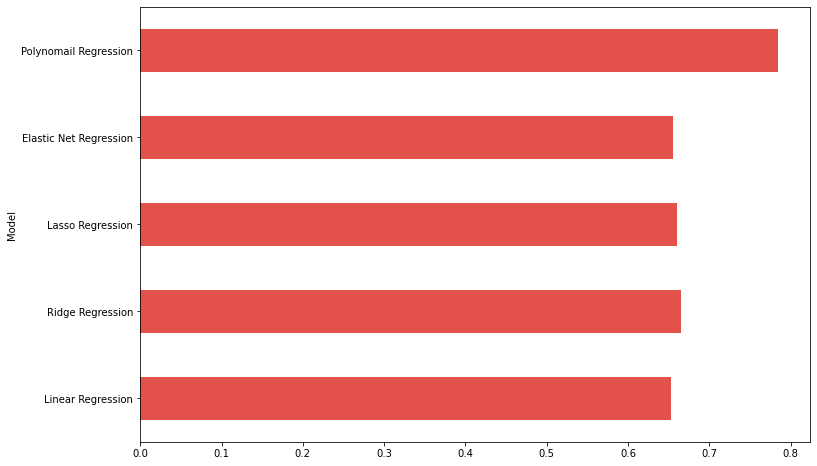

In [102]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

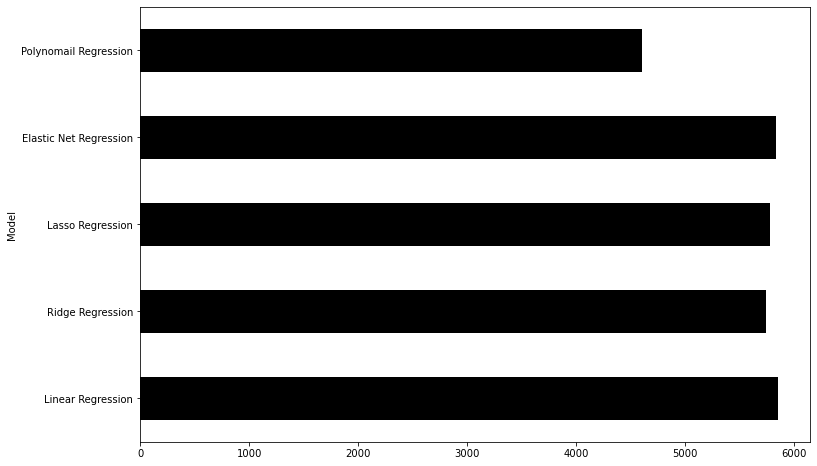

In [103]:
results_df['RMSE'].plot(kind='barh', color = "black", figsize=(12, 8))

## Regression Models Implementation and Evaluation with 90:10 Split

Initialising X and Y array

In [104]:
X = df[['AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony','NoOfRoom']]
y = df['RentPerMonth']

Train - Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 84)

In [106]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (900, 5)
Shape of X_test:  (100, 5)
Shape of y_train:  (900,)
Shape of y_test (100,)


In [107]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Preparing Data For Regression

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [110]:
print("Intercept:",lin_reg.intercept_)

Intercept: 10378.41111111111


In [111]:
coefficient_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficient_df

Coefficient
AreaSqFt     1594.501578
NoOfBath     2343.562574
NoOfPeople   6309.586183
NoOfBalcony   -79.353306
NoOfRoom      115.766190

In [112]:
pred = lin_reg.predict(X_test)

In [113]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4150.560376066256
MSE: 32427490.234154094
RMSE: 5694.5140472347675
R2 Square 0.7449503331506588
__________________________________
Train set evaluation:
_____________________________________
MAE: 3752.6595414578865
MSE: 34781577.25148428
RMSE: 5897.59080061378
R2 Square 0.6790654020812477
__________________________________


In [114]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  4150.560376  3.242749e+07  5694.514047    0.74495   

   Cross Validation  
0       -189.153433

### Ridge Regression 

In [115]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=84)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4079.5856483824678
MSE: 34297075.32146089
RMSE: 5856.370490454039
R2 Square 0.7302456165592446
__________________________________
Train set evaluation:
_____________________________________
MAE: 3609.119143231867
MSE: 35259745.19474126
RMSE: 5937.99168025194
R2 Square 0.674653277941585
__________________________________


In [116]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  4150.560376  3.242749e+07  5694.514047   0.744950   
1   Ridge Regression  4079.585648  3.429708e+07  5856.370490   0.730246   

   Cross Validation  
0       -189.153433  
1       -188.913057

### Lasso Regression

In [117]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, precompute=True,  positive=True, selection='random', random_state = 84)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4167.408638163877
MSE: 32496849.460453346
RMSE: 5700.600798201304
R2 Square 0.744404806887824
__________________________________
Train set evaluation:
_____________________________________
MAE: 3754.5910438225615
MSE: 34787417.86839047
RMSE: 5898.0859495594395
R2 Square 0.6790115098720234
__________________________________


In [118]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  4150.560376  3.242749e+07  5694.514047   0.744950   
1   Ridge Regression  4079.585648  3.429708e+07  5856.370490   0.730246   
2   Lasso Regression  4167.408638  3.249685e+07  5700.600798   0.744405   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256

### Elastic Net

In [119]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=84)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4140.146552179108
MSE: 32560108.899828658
RMSE: 5706.146589409412
R2 Square 0.7439072568516897
__________________________________
Train set evaluation:
_____________________________________
MAE: 3737.0086080834744
MSE: 34787379.379985444
RMSE: 5898.082686770798
R2 Square 0.6790118650100525
__________________________________


In [120]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  4150.560376  3.242749e+07  5694.514047   0.744950   
1        Ridge Regression  4079.585648  3.429708e+07  5856.370490   0.730246   
2        Lasso Regression  4167.408638  3.249685e+07  5700.600798   0.744405   
3  Elastic Net Regression  4140.146552  3.256011e+07  5706.146589   0.743907   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575

### Polynomial Regression

In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3114.8401568692852
MSE: 22781344.38785148
RMSE: 4772.980660745598
R2 Square 0.8208194882013446
__________________________________
Train set evaluation:
_____________________________________
MAE: 2518.7006361296803
MSE: 17419527.590379726
RMSE: 4173.670757304621
R2 Square 0.8392675224952727
__________________________________


In [122]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0       Linear Regression  4150.560376  3.242749e+07  5694.514047   0.744950   
1        Ridge Regression  4079.585648  3.429708e+07  5856.370490   0.730246   
2        Lasso Regression  4167.408638  3.249685e+07  5700.600798   0.744405   
3  Elastic Net Regression  4140.146552  3.256011e+07  5706.146589   0.743907   
4   Polynomail Regression  3114.840157  2.278134e+07  4772.980661   0.820819   

   Cross Validation  
0       -189.153433  
1       -188.913057  
2       -189.134256  
3       -152.868575  
4          0.000000

### Model Comparision with respect to R - Square [ Accuracy ] and Root Mean Sum of Errors [ Error ]

<AxesSubplot:ylabel='Model'>

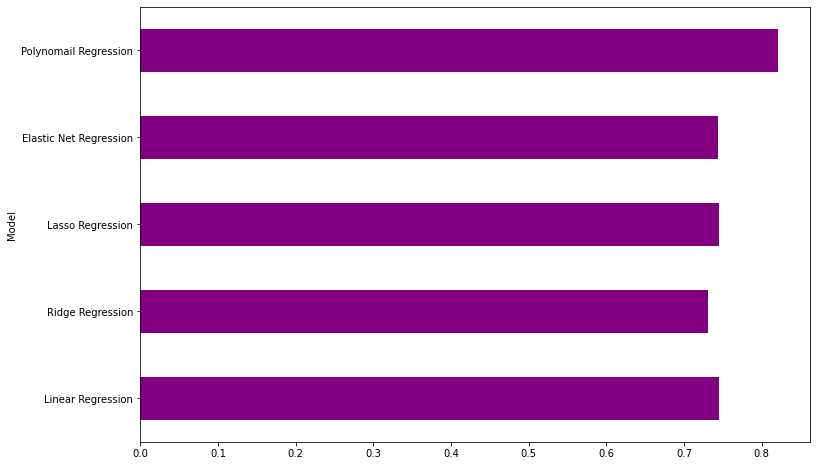

In [123]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh',color = "Purple", figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

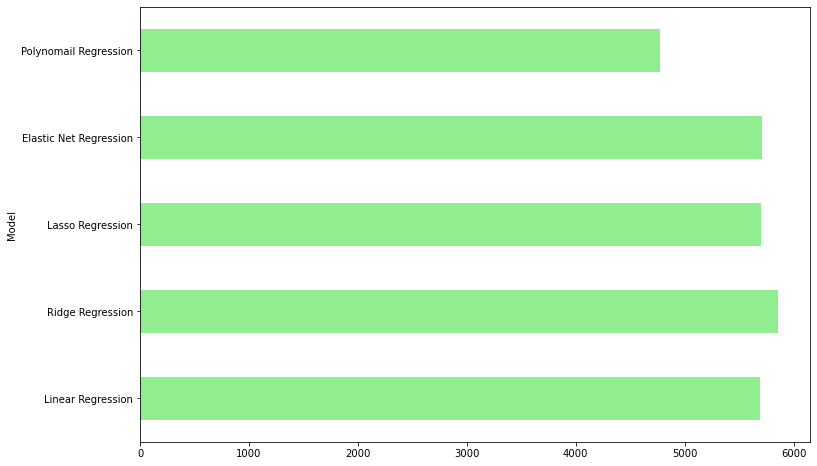

In [124]:
results_df['RMSE'].plot(kind='barh', color = "Lightgreen", figsize=(12, 8))

## Helping Prof. Naived to find him suitable residence in Lavasa.

Initialising X and Y array

In [125]:
X = df[['AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony']]
y = df['RentPerMonth']

Train - Test Split

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [127]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (700, 4)
Shape of X_test:  (300, 4)
Shape of y_train:  (700,)
Shape of y_test (300,)


In [128]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Preparing Data For Regression

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [131]:
print("Intercept:",lin_reg.intercept_)

Intercept: 10308.497857142856


In [132]:
coefficient_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficient_df

Coefficient
AreaSqFt     1485.901681
NoOfBath     2811.475873
NoOfPeople   5934.429294
NoOfBalcony  -252.647180

In [133]:
pred = lin_reg.predict(X_test)

In [134]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3811.97568079927
MSE: 37128649.69484962
RMSE: 6093.328293703665
R2 Square 0.7156981694978616
__________________________________
Train set evaluation:
_____________________________________
MAE: 3758.2718770191977
MSE: 33801865.90881428
RMSE: 5813.9372123212925
R2 Square 0.6671856098134995
__________________________________


In [135]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model          MAE           MSE         RMSE  R2 Square  \
0  Linear Regression  3811.975681  3.712865e+07  6093.328294   0.715698   

   Cross Validation  
0       -188.741946

Creating Suitable Dataset which will help Prof. Naived to come to the decision. 

In [136]:
import random
HR = pd.DataFrame(columns=['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath', 'NoOfPeople', 'NoOfBalcony'])
HR

Empty DataFrame
Columns: [BuildingType, Location, Size, AreaSqFt, NoOfBath, NoOfPeople, NoOfBalcony]
Index: []

In [137]:
BuildingTypes = df.BuildingType.unique()
for Building in BuildingTypes:
    print(Building)

Minimum Budget Rooms
Semi Furnished Single Room
Semi Furnished Flat
Fully Furnished Single Room
Super Furnished Single Room
Semi Furnished Villa
Fully Furnished Flat
Super Furnished Flat
Fully Furnished Villa
Super Furnished Villa


In [138]:
NoOfBath = [1, 2]
NoOfPeople = [1, 2]
NoOfBalcony = [0, 1, 2]
Location = ["Portofino","School Street"]
Size = ["1 BHK", "2 BHK"]

In [139]:
for Building in BuildingTypes:
    for Locate in Location:
        for size in Size:
            for Bathroom in NoOfBath:
                for People in NoOfPeople:
                    for Balcony in NoOfBalcony:

                        Build = {}
                        Build['BuildingType'] = Building
                        Build['Location'] = Locate
                        Build['Size'] = size
                        Build['AreaSqFt'] = random.randint(350, 600)
                        Build['NoOfBath'] = Bathroom
                        Build['NoOfPeople'] = People
                        Build['NoOfBalcony'] = Balcony

                        HR = HR.append(Build, ignore_index = True)

In [140]:
HR.head()

BuildingType   Location   Size AreaSqFt NoOfBath NoOfPeople  \
0  Minimum Budget Rooms  Portofino  1 BHK      406        1          1   
1  Minimum Budget Rooms  Portofino  1 BHK      536        1          1   
2  Minimum Budget Rooms  Portofino  1 BHK      533        1          1   
3  Minimum Budget Rooms  Portofino  1 BHK      437        1          2   
4  Minimum Budget Rooms  Portofino  1 BHK      390        1          2   

  NoOfBalcony  
0           0  
1           1  
2           2  
3           0  
4           1

In [141]:
HR.tail()

BuildingType       Location   Size AreaSqFt NoOfBath NoOfPeople  \
475  Super Furnished Villa  School Street  2 BHK      565        2          1   
476  Super Furnished Villa  School Street  2 BHK      360        2          1   
477  Super Furnished Villa  School Street  2 BHK      529        2          2   
478  Super Furnished Villa  School Street  2 BHK      391        2          2   
479  Super Furnished Villa  School Street  2 BHK      391        2          2   

    NoOfBalcony  
475           1  
476           2  
477           0  
478           1  
479           2

In [142]:
HR.to_csv("NewHousingPrices.csv", index = False)

In [143]:
NHR = pd.read_csv("NewHousingPrices.csv")

Predicting Rent for New Dataset Based on Past Observation

In [144]:
NHR['Rent'] = (10308.4978 + (1485.9016 * NHR['AreaSqFt']) + (2811.4758 * NHR['NoOfBath']) + (5934.4292 * NHR['NoOfPeople']) + (-252.6471 * NHR['NoOfBalcony']))

In [145]:
NHR.sample(10)

BuildingType       Location   Size  AreaSqFt  NoOfBath  \
234  Super Furnished Single Room  School Street  2 BHK       597         2   
190  Fully Furnished Single Room  School Street  2 BHK       528         2   
477        Super Furnished Villa  School Street  2 BHK       529         2   
324         Fully Furnished Flat  School Street  2 BHK       582         1   
408        Fully Furnished Villa  School Street  1 BHK       374         1   
387        Fully Furnished Villa      Portofino  1 BHK       410         1   
8           Minimum Budget Rooms      Portofino  1 BHK       595         2   
302         Fully Furnished Flat      Portofino  2 BHK       461         1   
328         Fully Furnished Flat  School Street  2 BHK       449         1   
333         Fully Furnished Flat  School Street  2 BHK       419         2   

     NoOfPeople  NoOfBalcony         Rent  
234           1            0  908949.1338  
190           2            1  812103.7055  
477           2            0  813842.2542  
324           1            0  883849.1340  
408           1            0  574781.6012  
387           2            0  634208.4880  
8             1            2  905472.0364  
302           1            2  703549.7462  
328           2            1  691906.0033  
333           2            0  650393.0782

In [146]:
def main():
    print("====================================")
    print("\tSearch for Dream House")
    print("====================================")
    print("Enter 1 To Search.")
    print("Enter 0 To Terminate the Search.")
    print("====================================")
    while True:
        loop = int(input("Enter your choice from the above menu?:"))
        if loop == 0 or loop > 1:
            print("Thank you for searching.")
            break

        if loop == 1:
            print("-----------------------------------------------------")
            print("Search by Building Type\n")
            print("Minimum Budget Rooms\n"
                  "Semi Furnished Single Room\n"
                  "Semi Furnished Flat\n"
                  "Fully Furnished Single Room\n"
                  "Super Furnished Single Room\n"
                  "Semi Furnished Villa\n"
                  "Fully Furnished Flat\n"
                  "Super Furnished Flat\n"
                  "Fully Furnished Villa\n"
                  "Super Furnished Villa")
            print("=====================================================")
            BT = str(input('Building Type:'))
            HouseRent = pd.DataFrame(NHR[NHR['BuildingType'].str.contains(BT)])
            return HouseRent
main()

	Search for Dream House
Enter 1 To Search.
Enter 0 To Terminate the Search.
Enter your choice from the above menu?:1
-----------------------------------------------------
Search by Building Type

Minimum Budget Rooms
Semi Furnished Single Room
Semi Furnished Flat
Fully Furnished Single Room
Super Furnished Single Room
Semi Furnished Villa
Fully Furnished Flat
Super Furnished Flat
Fully Furnished Villa
Super Furnished Villa
Building Type:Semi Furnished Flat


BuildingType       Location   Size  AreaSqFt  NoOfBath  \
96   Semi Furnished Flat      Portofino  1 BHK       503         1   
97   Semi Furnished Flat      Portofino  1 BHK       593         1   
98   Semi Furnished Flat      Portofino  1 BHK       525         1   
99   Semi Furnished Flat      Portofino  1 BHK       402         1   
100  Semi Furnished Flat      Portofino  1 BHK       531         1   
101  Semi Furnished Flat      Portofino  1 BHK       444         1   
102  Semi Furnished Flat      Portofino  1 BHK       578         2   
103  Semi Furnished Flat      Portofino  1 BHK       487         2   
104  Semi Furnished Flat      Portofino  1 BHK       363         2   
105  Semi Furnished Flat      Portofino  1 BHK       451         2   
106  Semi Furnished Flat      Portofino  1 BHK       393         2   
107  Semi Furnished Flat      Portofino  1 BHK       387         2   
108  Semi Furnished Flat      Portofino  2 BHK       452         1   
109  Semi Furnished Flat      Portofino  2 BHK       359         1   
110  Semi Furnished Flat      Portofino  2 BHK       366         1   
111  Semi Furnished Flat      Portofino  2 BHK       572         1   
112  Semi Furnished Flat      Portofino  2 BHK       523         1   
113  Semi Furnished Flat      Portofino  2 BHK       510         1   
114  Semi Furnished Flat      Portofino  2 BHK       378         2   
115  Semi Furnished Flat      Portofino  2 BHK       422         2   
116  Semi Furnished Flat      Portofino  2 BHK       471         2   
117  Semi Furnished Flat      Portofino  2 BHK       598         2   
118  Semi Furnished Flat      Portofino  2 BHK       443         2   
119  Semi Furnished Flat      Portofino  2 BHK       379         2   
120  Semi Furnished Flat  School Street  1 BHK       434         1   
121  Semi Furnished Flat  School Street  1 BHK       455         1   
122  Semi Furnished Flat  School Street  1 BHK       492         1   
123  Semi Furnished Flat  School Street  1 BHK       410         1   
124  Semi Furnished Flat  School Street  1 BHK       453         1   
125  Semi Furnished Flat  School Street  1 BHK       402         1   
126  Semi Furnished Flat  School Street  1 BHK       480         2   
127  Semi Furnished Flat  School Street  1 BHK       469         2   
128  Semi Furnished Flat  School Street  1 BHK       394         2   
129  Semi Furnished Flat  School Street  1 BHK       434         2   
130  Semi Furnished Flat  School Street  1 BHK       406         2   
131  Semi Furnished Flat  School Street  1 BHK       380         2   
132  Semi Furnished Flat  School Street  2 BHK       371         1   
133  Semi Furnished Flat  School Street  2 BHK       362         1   
134  Semi Furnished Flat  School Street  2 BHK       449         1   
135  Semi Furnished Flat  School Street  2 BHK       532         1   
136  Semi Furnished Flat  School Street  2 BHK       535         1   
137  Semi Furnished Flat  School Street  2 BHK       446         1   
138  Semi Furnished Flat  School Street  2 BHK       413         2   
139  Semi Furnished Flat  School Street  2 BHK       462         2   
140  Semi Furnished Flat  School Street  2 BHK       538         2   
141  Semi Furnished Flat  School Street  2 BHK       387         2   
142  Semi Furnished Flat  School Street  2 BHK       450         2   
143  Semi Furnished Flat  School Street  2 BHK       474         2   

     NoOfPeople  NoOfBalcony         Rent  
96            1            0  766462.9076  
97            1            1  899941.4045  
98            1            2  798647.4486  
99            2            0  622321.2752  
100           2            1  813749.9345  
101           2            2  684223.8482  
102           1            0  880717.0034  
103           1            1  745247.3107  
104           1            2  560742.8652  
105           2            0  697941.9294  
106           2            1  611506.9895  
107           2            2  602338.9328  
108      

## Conclusion

In this lab, we have tried to gain the knowledge about data and its variables, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights, furthermore, we implemented and evaluated various regression models to get high accuracy in terms of predicting price which can help the Public Relations Team who are working in the Christ (Deemed To Be University) Lavasa Campus, to find houses for people who are in search for the one according to there preferences. 